In [1]:
import os
from glob import glob
import numpy as np
import pandas as pd
from collections import OrderedDict
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import sys
sys.path.append('..')
from params import *

In [3]:
# building translation dictionary
runs_name = sorted(os.listdir(runs_path))
run_dict = {'_'.join(x.split('_')[:2]): x.rsplit('-')[-1] for x in runs_name}
run_dict = OrderedDict(run_dict)

In [4]:
run_dict

OrderedDict([('AlexNet_D1', 'aOngXc'),
             ('AlexNet_D2', 'xg1xbI'),
             ('AlexNet_D3', 'QPkg5u'),
             ('ResNet_D1', '57XX4Z'),
             ('ResNet_D2', 'FdAcja'),
             ('ResNet_D3', 'HCwod8'),
             ('VGG_D1', 'Dgd0Zj'),
             ('VGG_D2', '3QtFXk'),
             ('VGG_D3', 'BGiWjF')])

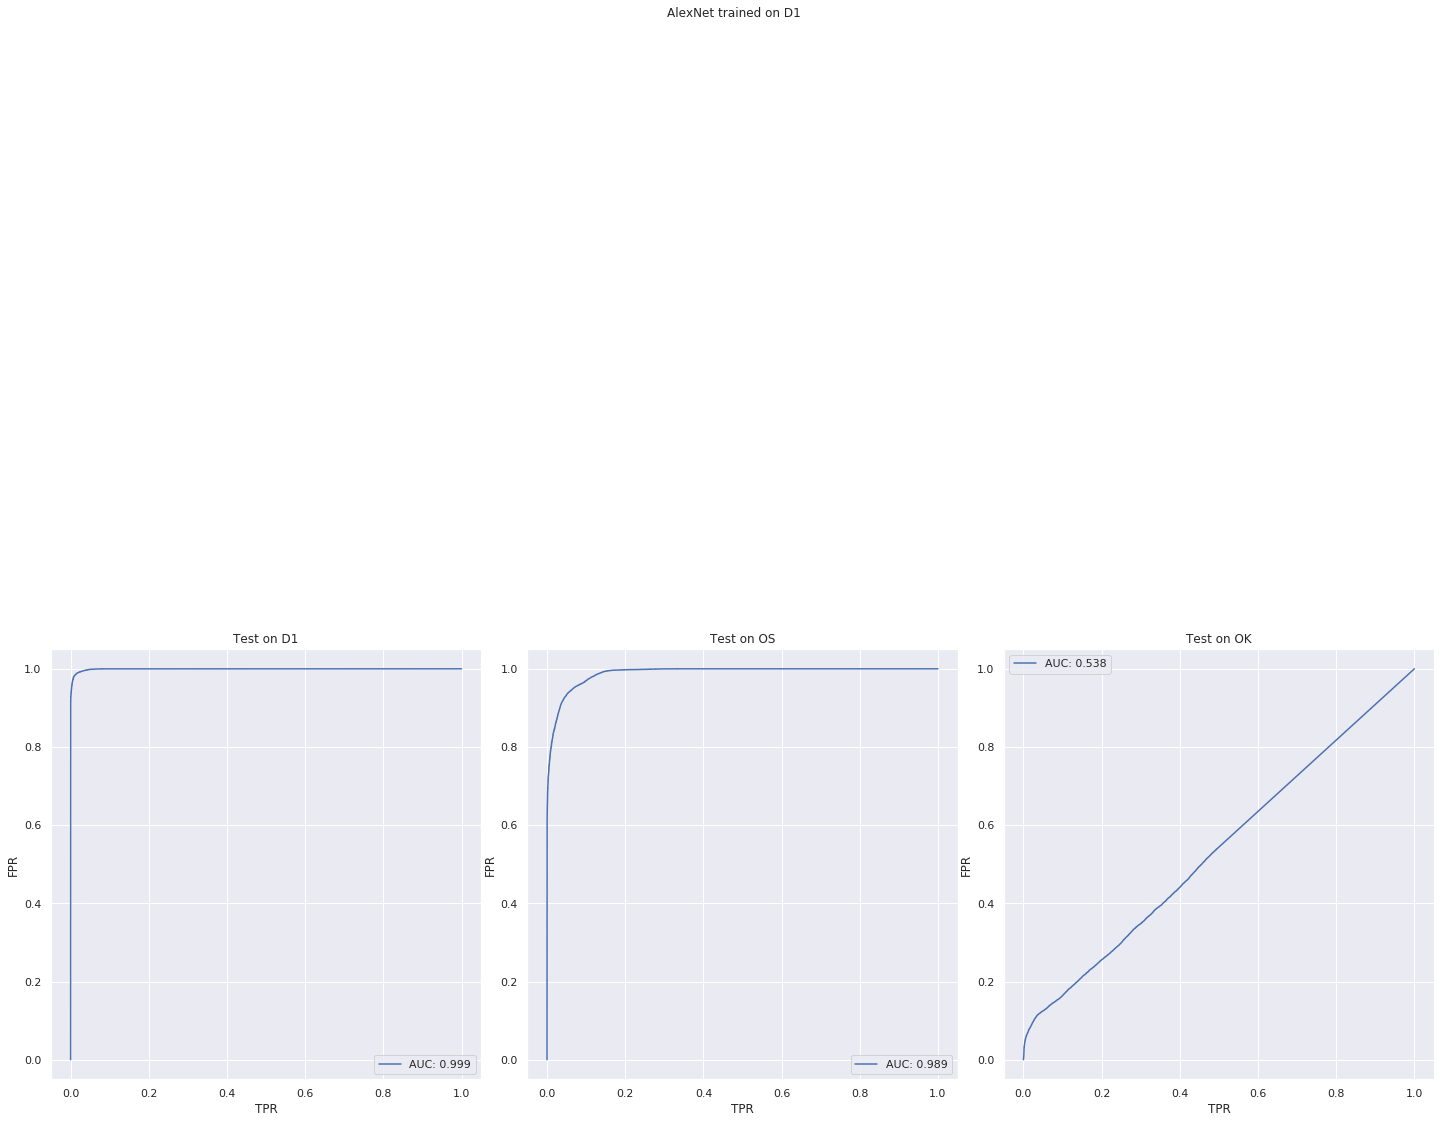

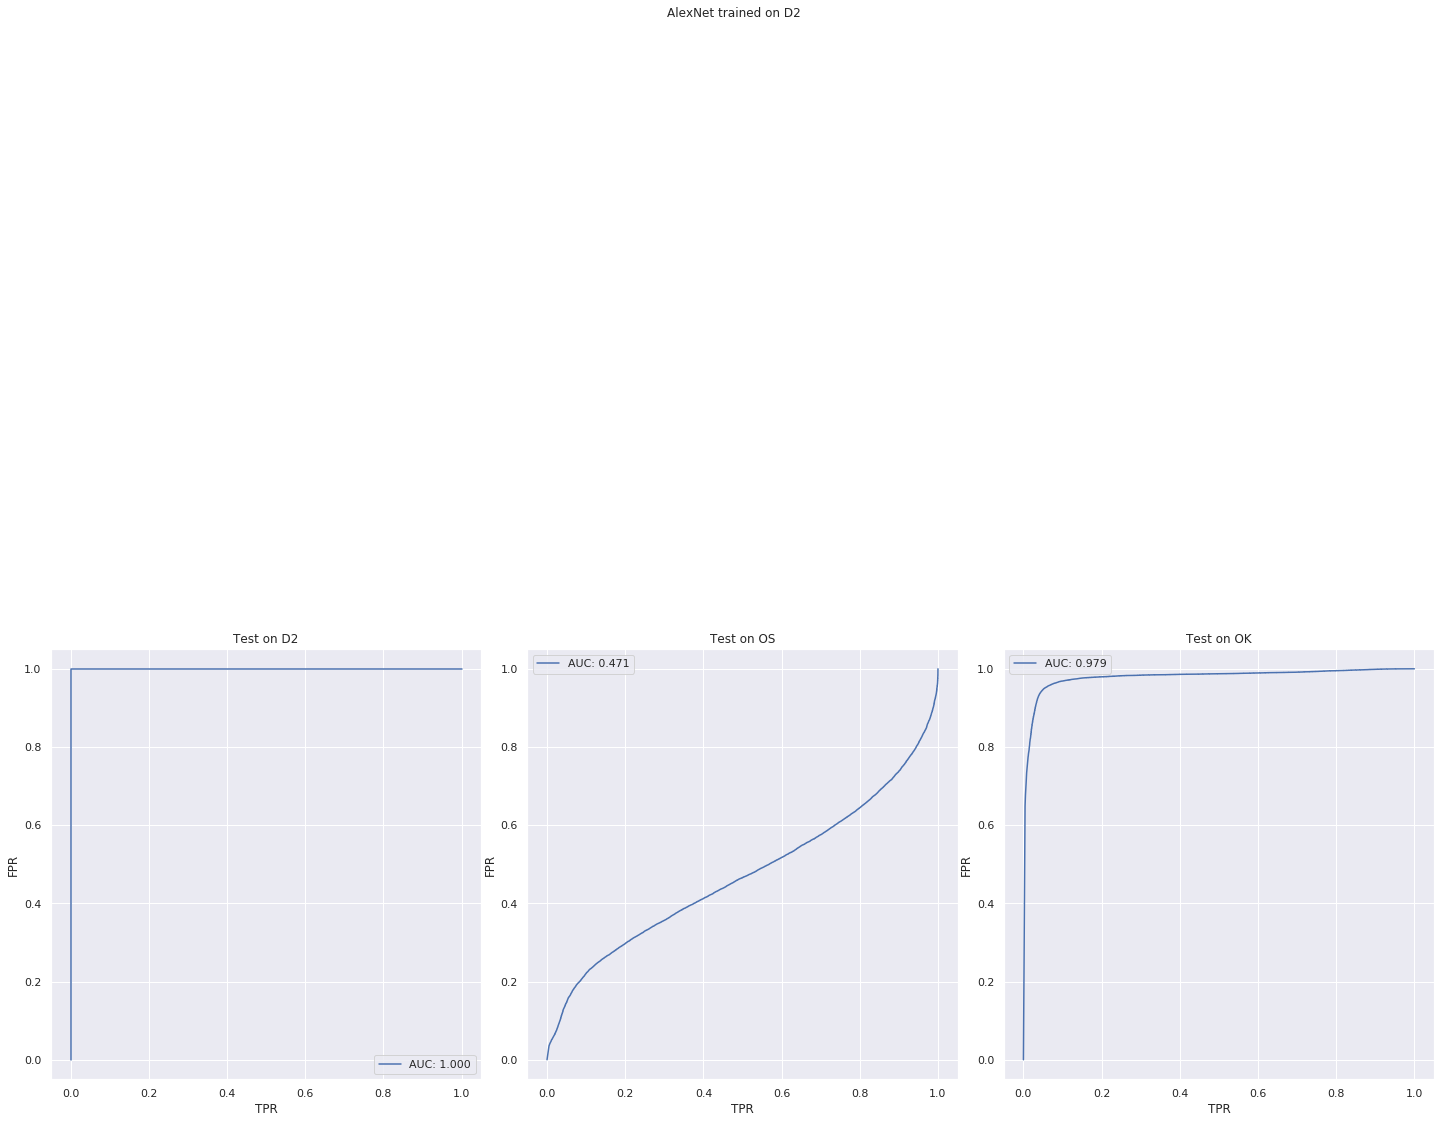

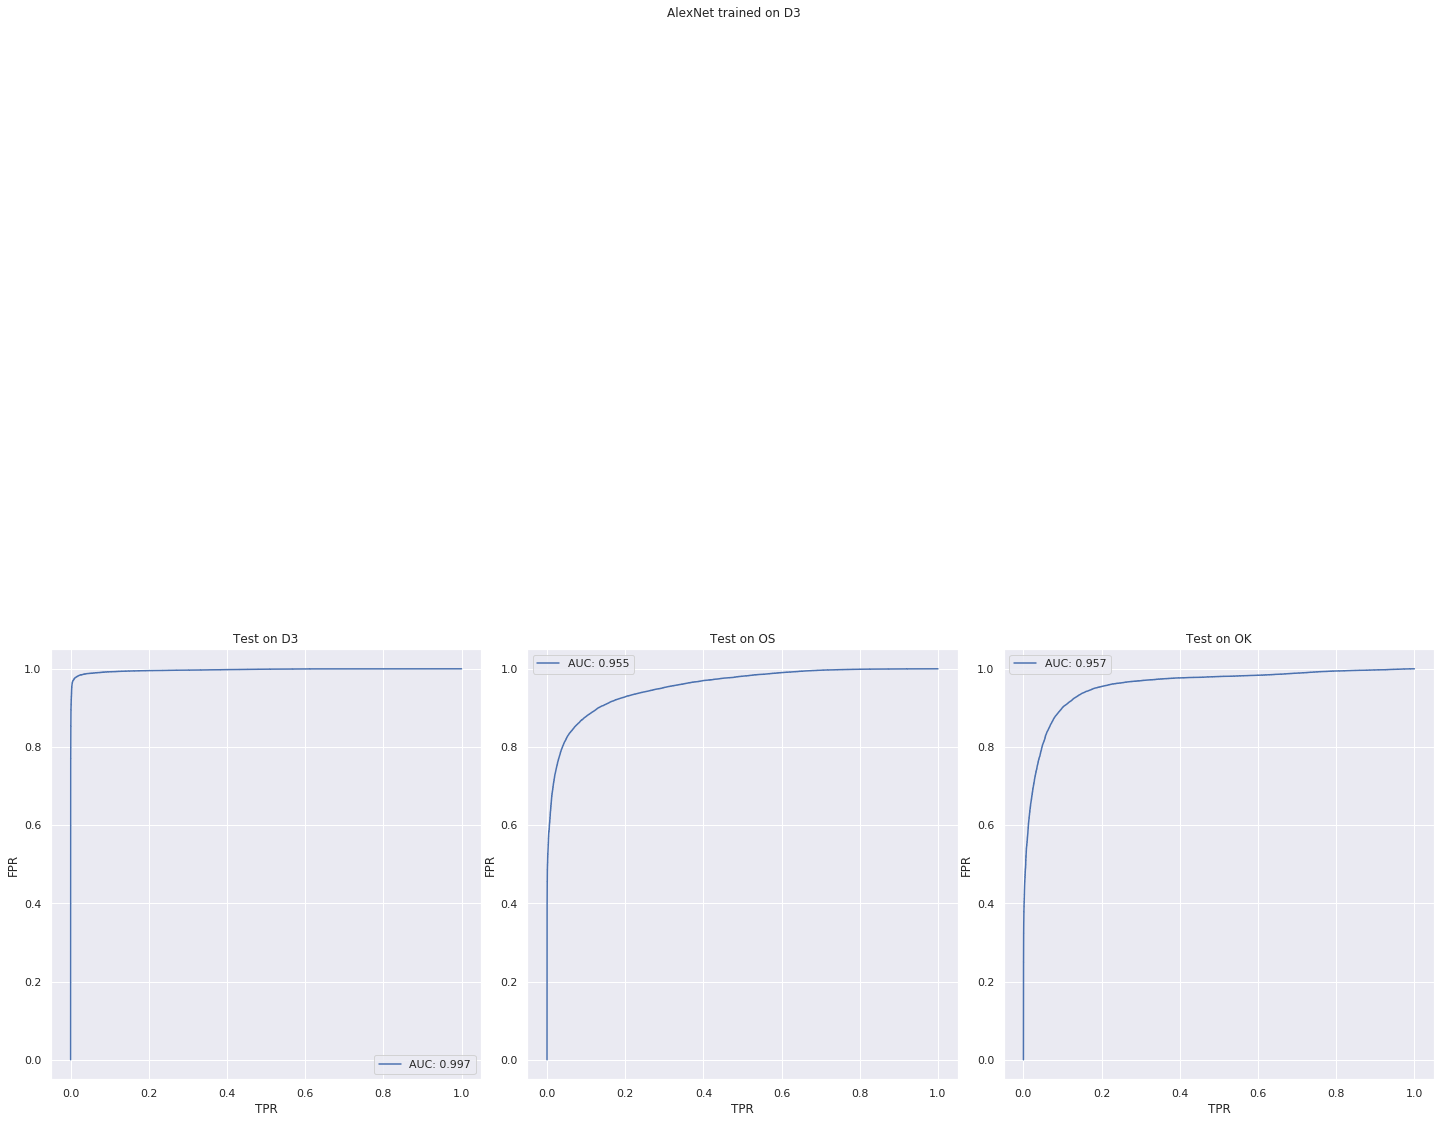

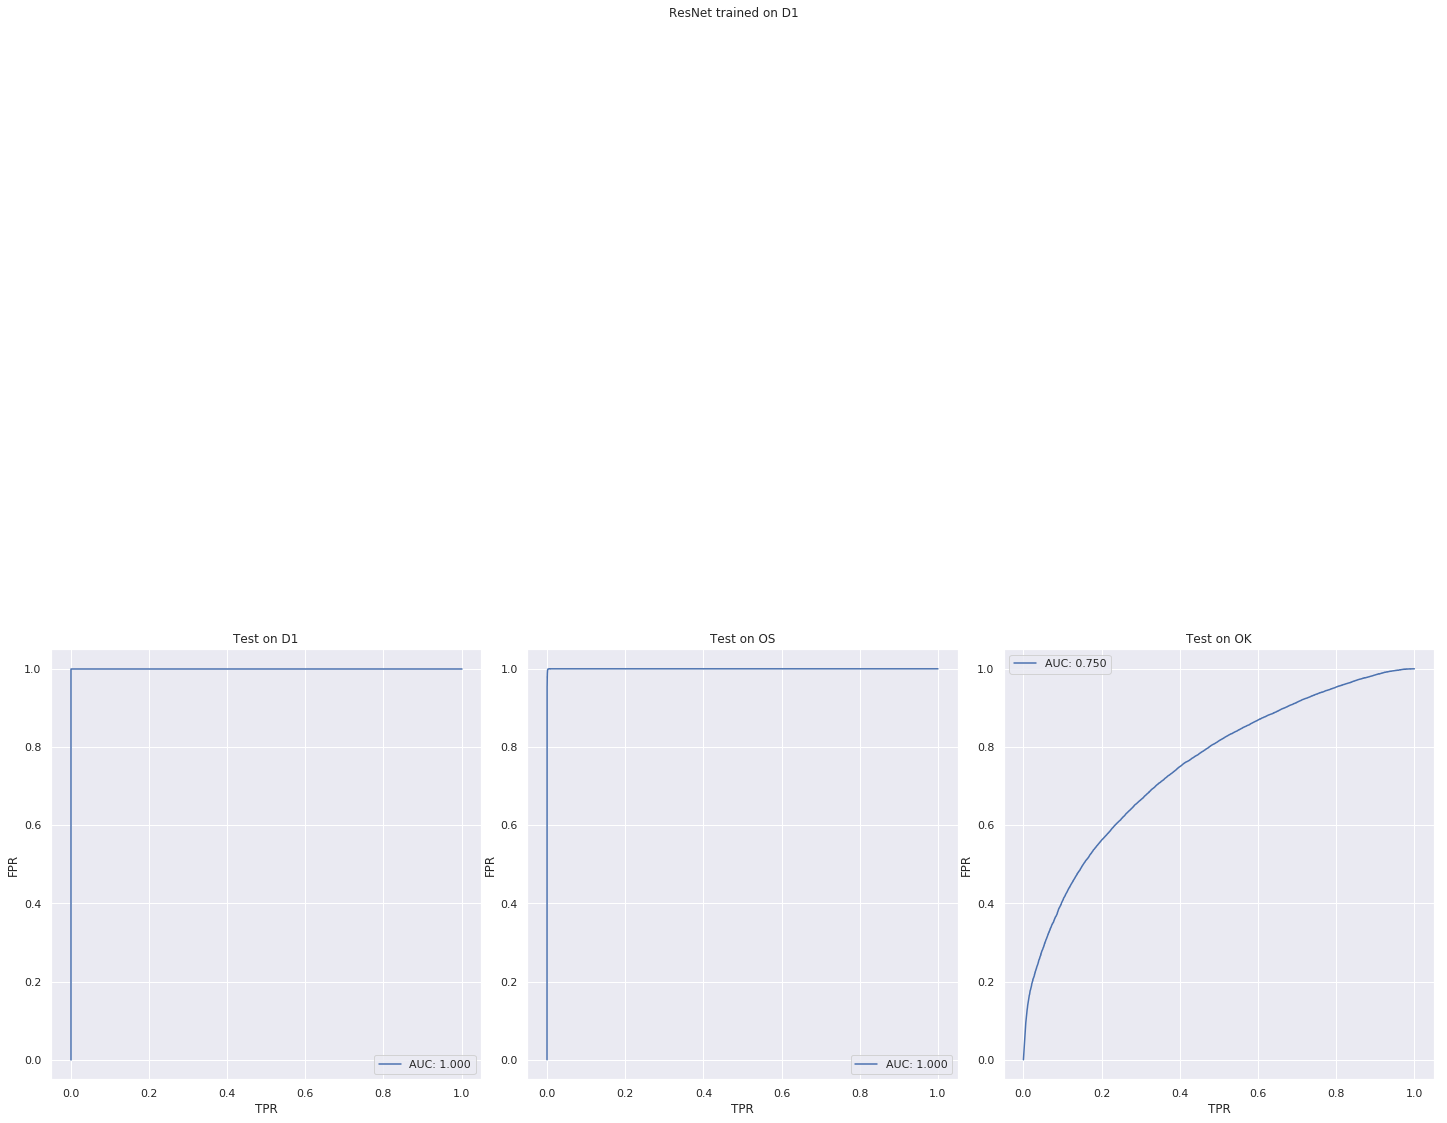

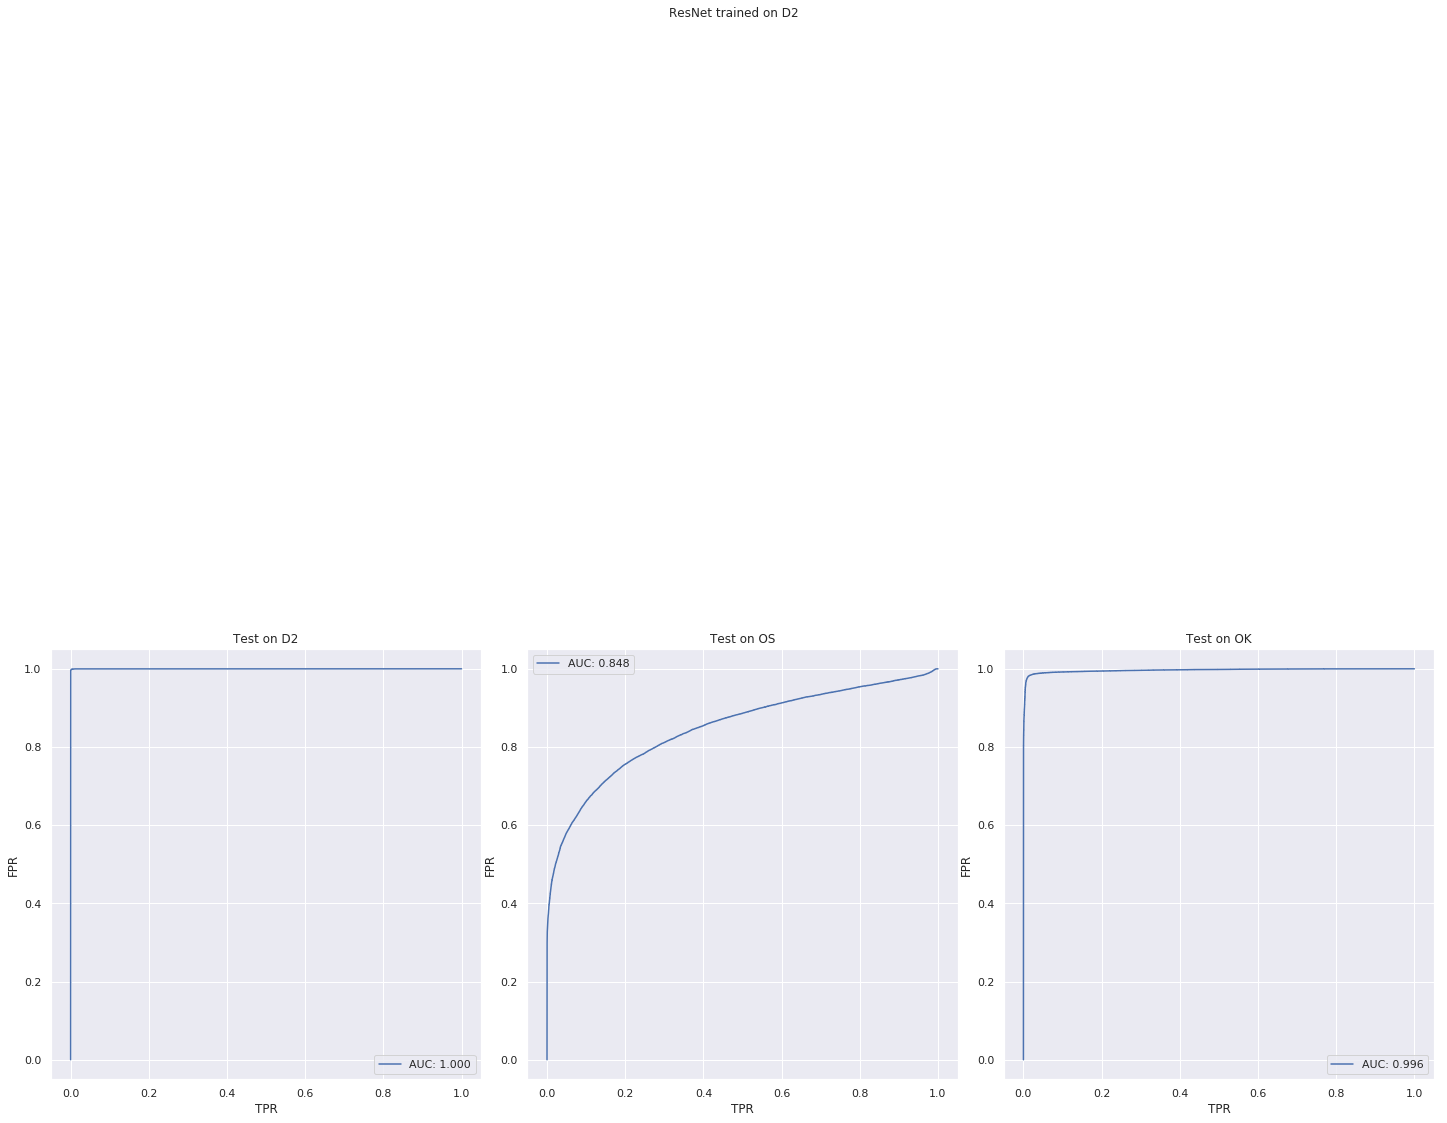

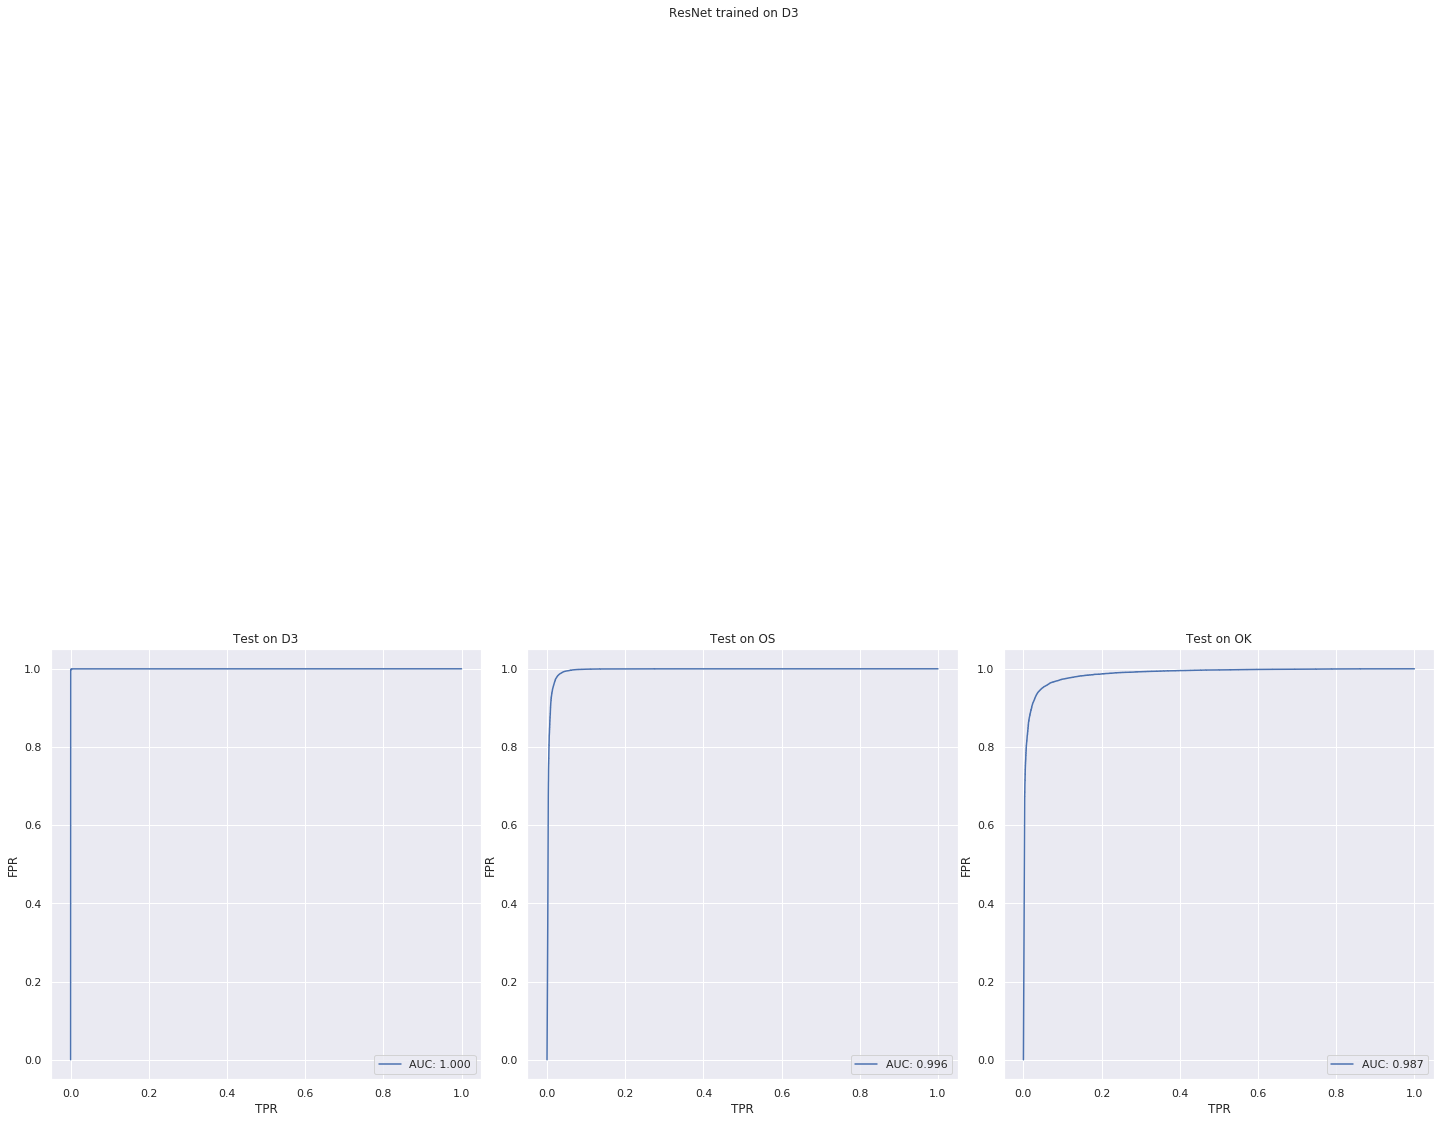

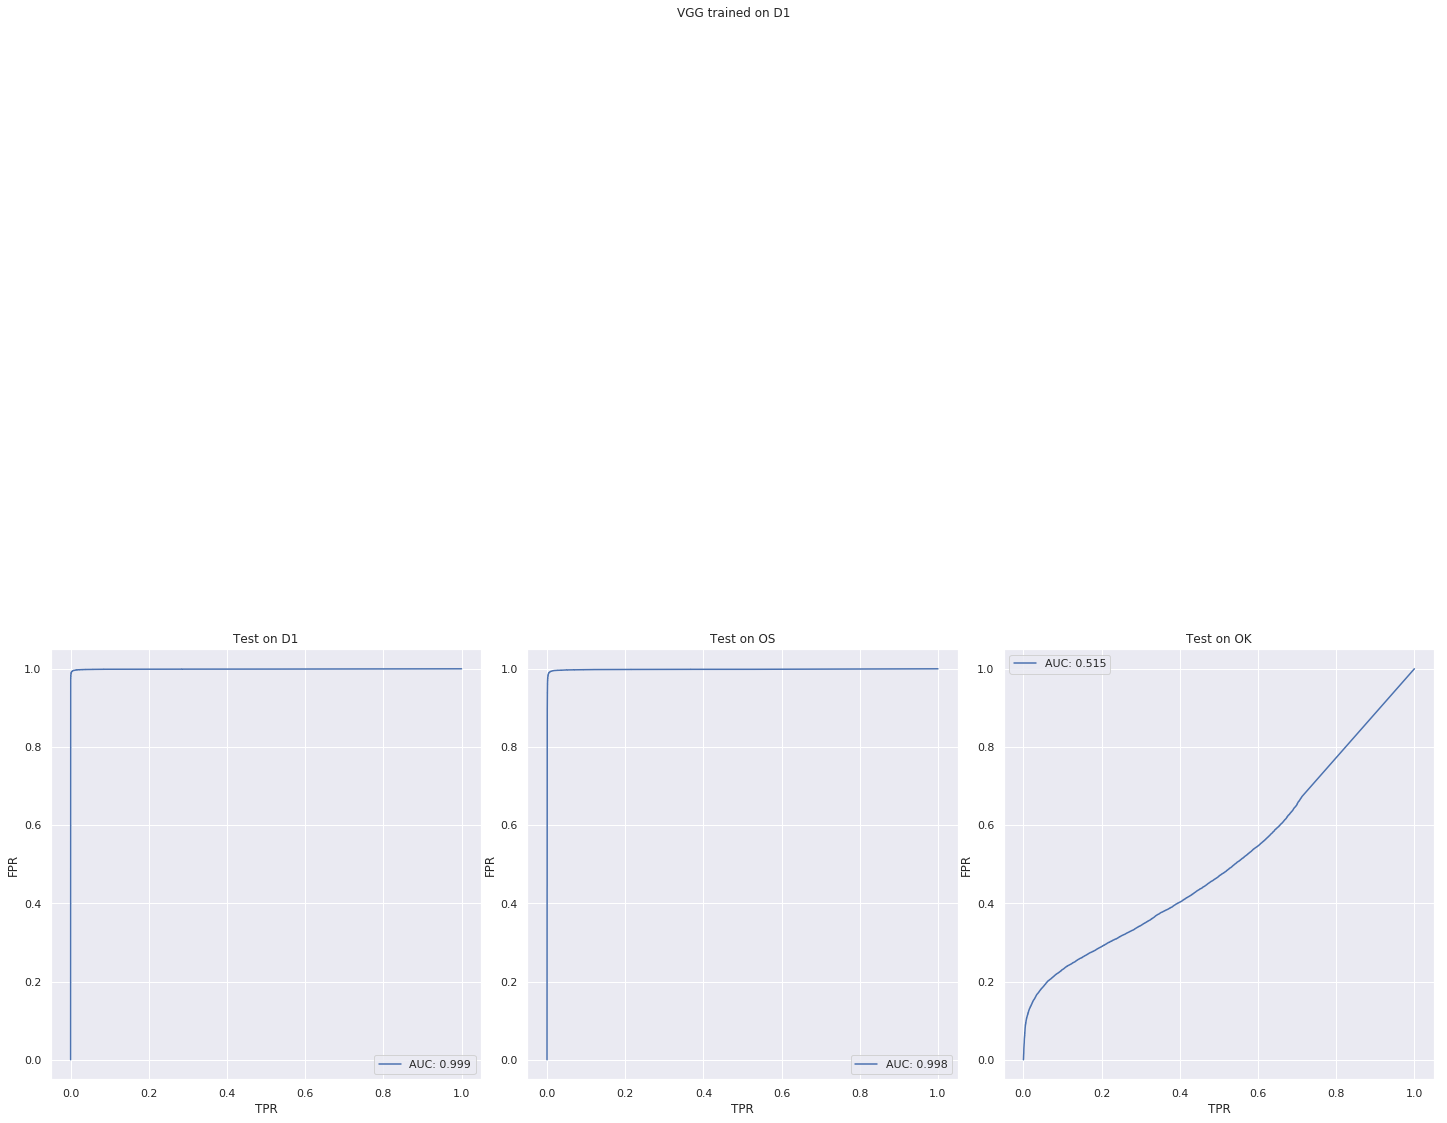

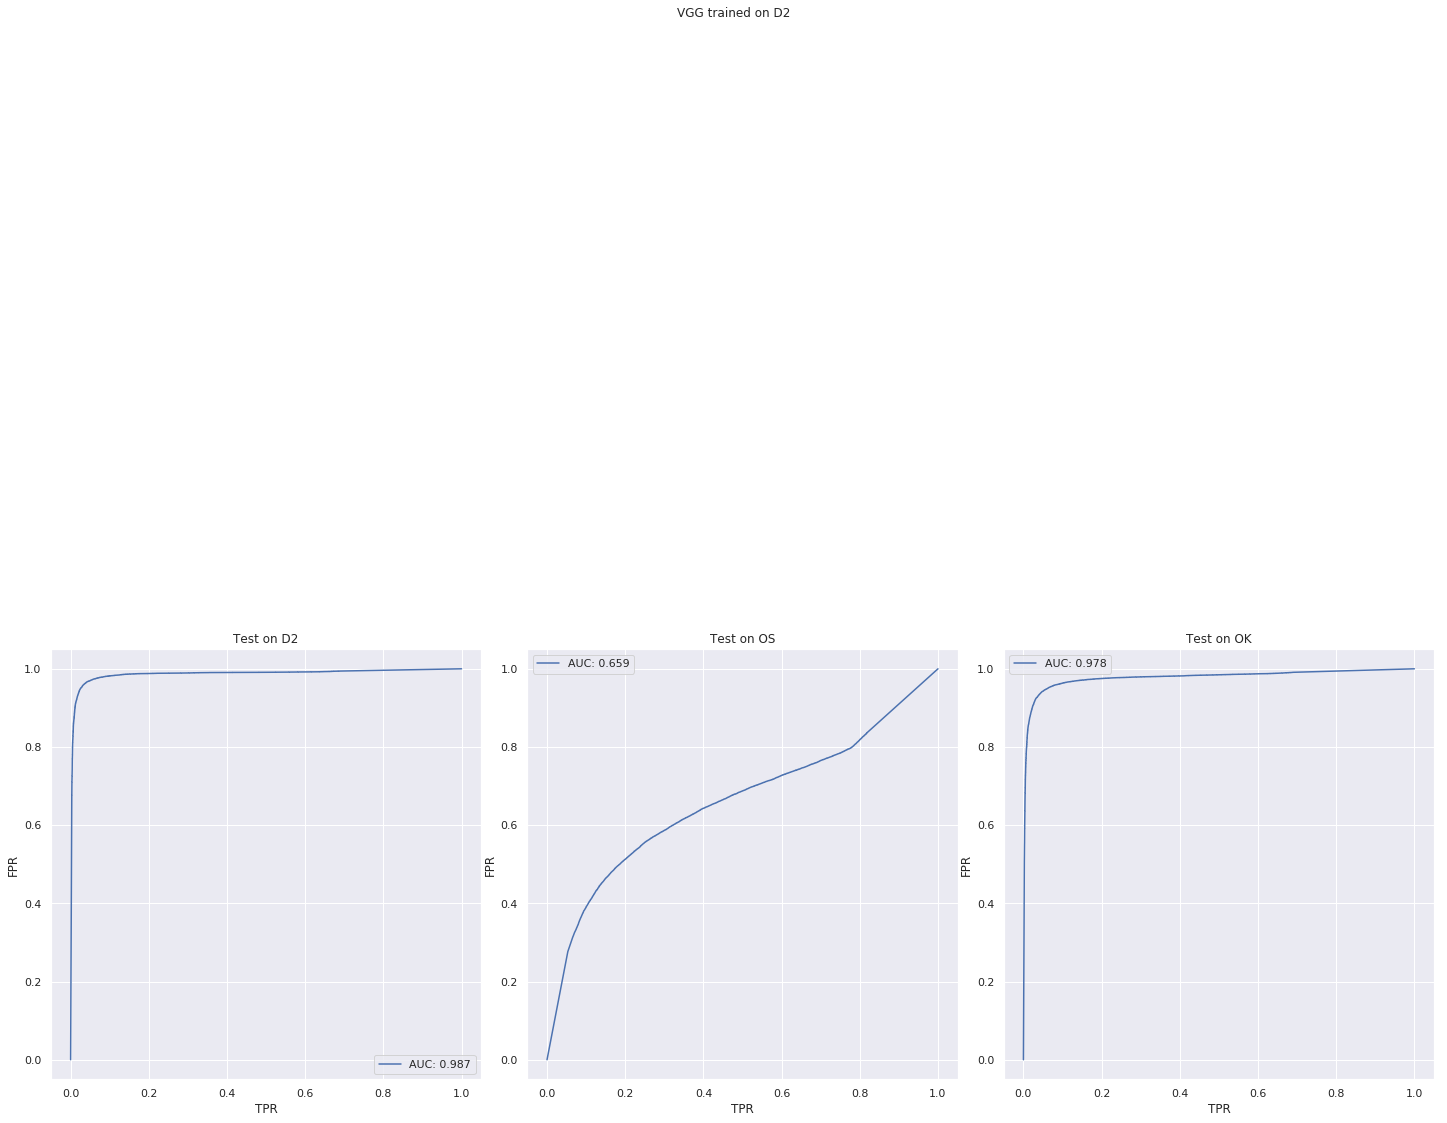

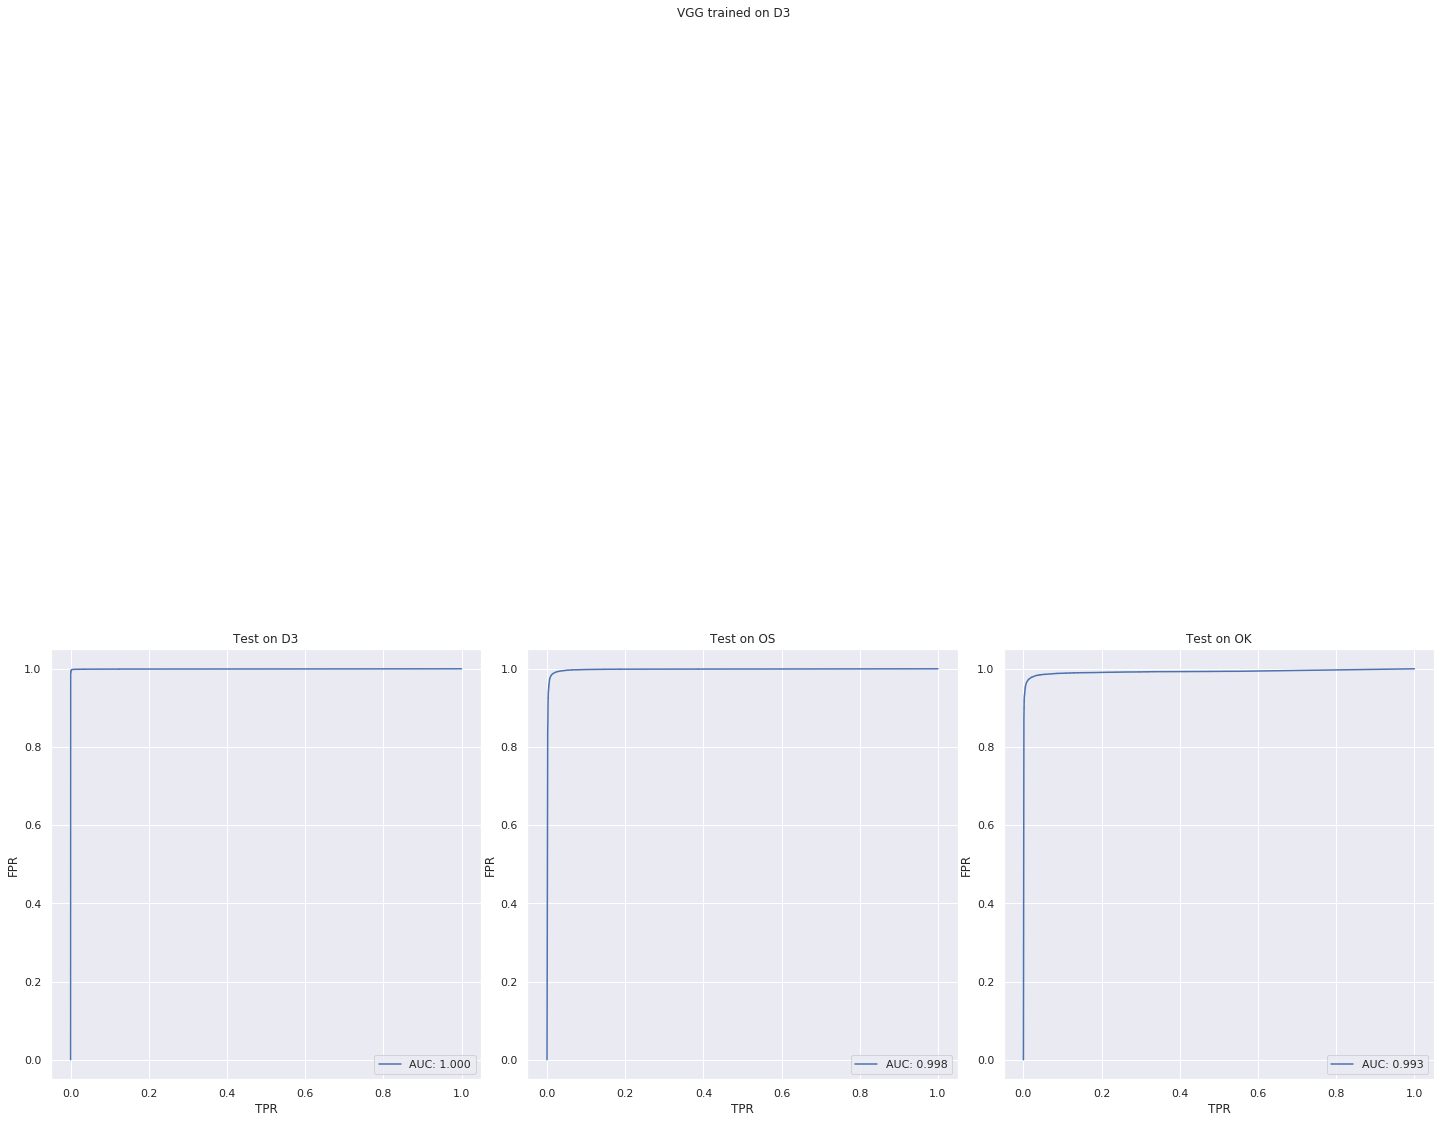

In [5]:
for k, v in run_dict.items():
    train_res = np.load(os.path.join(glob(os.path.join(results_path, '{}_D*'.format(v)))[0], 'result.npy')).item()
    os_res = np.load(os.path.join(glob(os.path.join(results_path, '{}_TestOS'.format(v)))[0], 'result.npy')).item()
    ok_res = np.load(os.path.join(glob(os.path.join(results_path, '{}_TestOK'.format(v)))[0], 'result.npy')).item()
    
#     plt.figure(figsize=(20, 25))
    fig, axs = plt.subplots(1, 3, figsize=(20, 25))
    fig.suptitle('{} trained on {}'.format(*k.split('_')))
    plt.tight_layout()
    
    auc = np.trapz(train_res['fpr'], x=train_res['tpr'])
    axs[0].plot(train_res['tpr'], train_res['fpr'], label='AUC: {:.3f}'.format(auc))
    axs[0].legend()
    axs[0].set_title('Test on {}'.format(k.split('_')[-1]))
    axs[0].set_xlabel('TPR')
    axs[0].set_ylabel('FPR')
    axs[0].axis('image')
    
    auc = np.trapz(os_res['fpr'], x=os_res['tpr'])
    axs[1].plot(os_res['tpr'], os_res['fpr'], label='AUC: {:.3f}'.format(auc))
    axs[1].legend()
    axs[1].set_title('Test on OS')
    axs[1].set_xlabel('TPR')
    axs[1].set_ylabel('FPR')
    axs[1].axis('image')
    
    auc = np.trapz(ok_res['fpr'], x=ok_res['tpr'])
    axs[2].plot(ok_res['tpr'], ok_res['fpr'], label='AUC: {:.3f}'.format(auc))
    axs[2].legend()
    axs[2].set_title('Test on OK')
    axs[2].set_xlabel('TPR')
    axs[2].set_ylabel('FPR')
    axs[2].axis('image')
